In [1]:
import pandas as pd
import numpy as np
import ast

# 单步法按batch合并数据

In [2]:
data = pd.read_excel('./data_stage2/one_step_attack_total100_0919/one_step_attack_total100_0919_normed.xlsx')
print(data.shape)
data.head()

(30060, 13)


,model,algo,mask_mode,parameter,eta,pixel_attacked,attack_ratio_per_channel,l1_norm,l2_norm,success_rate,run_time,batch_idx,batch_pictures
0,vit_b_16,fgsm,positive,NaN,0.005,75234,"[0.501, 0.499, 0.5]",36.1188,0.00492,0.12,5.372,1,100
1,vit_b_16,fgsm,positive,NaN,0.010,75234,"[0.501, 0.499, 0.5]",36.1188,0.00492,0.24,5.372,1,100
2,vit_b_16,fgsm,positive,NaN,0.015,75234,"[0.501, 0.499, 0.5]",36.1188,0.00492,0.40,5.372,1,100
3,vit_b_16,fgsm,positive,NaN,0.020,75234,"[0.501, 0.499, 0.5]",36.1188,0.00492,0.49,5.372,1,100
4,vit_b_16,fgsm,positive,NaN,0.025,75234,"[0.501, 0.499, 0.5]",36.1188,0.00492,0.57,5.372,1,100


In [3]:
def mean_of_lists(series):
    # 将每个元素转换为 NumPy 数组，然后计算均值
    arrays = np.array(series.tolist(), dtype=float)
    return np.mean(arrays, axis=0).tolist()

def l1_norm(series):
    return series.abs().sum()

def l2_norm(series):
    return np.sqrt((series ** 2).sum())

def merge_batch_onestep(data): 
    '''将多个batch的数据合并''' 
    data['parameter'] = data['parameter'].fillna(-1)
    data['attack_ratio_per_channel'] = data['attack_ratio_per_channel'].apply(ast.literal_eval)
    li = ['model', 'algo', 'mask_mode', 'parameter', 'eta']
    data_grouped = data.groupby(li).agg({
        'pixel_attacked': lambda x: int(x.mean()),
        'attack_ratio_per_channel': mean_of_lists,
        'l1_norm': l1_norm,
        'l2_norm': l2_norm,
        'success_rate': lambda x: round(x.mean(), 4),
        'run_time': 'sum',
        'batch_pictures': 'sum'
    }).reset_index()
    data_grouped[['R', 'G', 'B']] = pd.DataFrame(data_grouped['attack_ratio_per_channel'].tolist(), index=data_grouped.index)
    data_grouped.drop('attack_ratio_per_channel', axis=1, inplace=True)
    return data_grouped

In [4]:
data_grouped = merge_batch_onestep(data)
print(data_grouped.shape)
data_grouped.head()

(30060, 14)


,model,algo,mask_mode,parameter,eta,pixel_attacked,l1_norm,l2_norm,success_rate,run_time,batch_pictures,R,G,B
0,resnet50,fgsm,all,-1.0,0.005,150528,119.0806,0.011951,0.48,1.981,100,1.0,1.0,1.0
1,resnet50,fgsm,all,-1.0,0.010,150528,119.0806,0.011951,0.74,1.981,100,1.0,1.0,1.0
2,resnet50,fgsm,all,-1.0,0.015,150528,119.0806,0.011951,0.81,1.981,100,1.0,1.0,1.0
3,resnet50,fgsm,all,-1.0,0.020,150528,119.0806,0.011951,0.82,1.981,100,1.0,1.0,1.0
4,resnet50,fgsm,all,-1.0,0.025,150528,119.0806,0.011951,0.85,1.981,100,1.0,1.0,1.0


In [5]:
data_grouped.to_excel('./data_stage2/one_step_attack_total100_0919/one_step_attack_total100_0919_normed_grouped.xlsx', index=False)

# 结果分析

In [ ]:
data_grouped = pd.read_excel('./data_stage2/one_step_attack_total100_0919/one_step_attack_total100_0919_normed_grouped.xlsx')

In [3]:
for column in data_grouped.columns:
    if column not in ('l1_norm', 'l2_norm', 'success_rate','pixel_attacked', 'run_time',  'R', 'G', 'B'):
        unique_values = data_grouped[column].unique()
        print(f"字段 '{column}' 的唯一值: {unique_values}")
print(data_grouped.columns)


字段 'model' 的唯一值: ['resnet50' 'vgg16' 'vit_b_16']
字段 'algo' 的唯一值: ['fgsm' 'gaussian_noise']
字段 'mask_mode' 的唯一值: ['all' 'cam_lowr' 'cam_topr' 'lowr' 'negative' 'positive' 'randomr' 'topr']
字段 'parameter' 的唯一值: [-1.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99]
字段 'eta' 的唯一值: [0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1  ]
字段 'batch_pictures' 的唯一值: [100]
Index(['mode

# 画图分析

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os
import math
from sklearn.linear_model import LinearRegression

In [8]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print("Available fonts:", font_list)

# 使用第一个找到的中文字体
font_path = next((f for f in font_list if 'SimHei' in f or 'SimSun' in f or 'wqy' in f), None)

Available fonts: ['/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf']


In [6]:
font_path = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'  # 显示中文字体

if not os.path.exists(font_path):
    print(f"字体文件 {font_path} 未找到。请确保字体文件存在于工作目录中。")
else:
    # 创建FontProperties对象
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()


## 1. success_rate vs model&algo
- 只考虑mask_mode in ('all','negative','positive')

In [10]:
data1 = data_grouped[data_grouped['mask_mode'].isin(['all','negative','positive'])]
data1.head()

,model,algo,mask_mode,parameter,eta,pixel_attacked,l1_norm,l2_norm,success_rate,run_time,batch_pictures,R,G,B
0,resnet50,fgsm,all,-1.0,0.005,150528,119.0806,0.011951,0.48,1.981,100,1.0,1.0,1.0
1,resnet50,fgsm,all,-1.0,0.010,150528,119.0806,0.011951,0.74,1.981,100,1.0,1.0,1.0
2,resnet50,fgsm,all,-1.0,0.015,150528,119.0806,0.011951,0.81,1.981,100,1.0,1.0,1.0
3,resnet50,fgsm,all,-1.0,0.020,150528,119.0806,0.011951,0.82,1.981,100,1.0,1.0,1.0
4,resnet50,fgsm,all,-1.0,0.025,150528,119.0806,0.011951,0.85,1.981,100,1.0,1.0,1.0


### 1.1 成功率 vs eta

findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not 

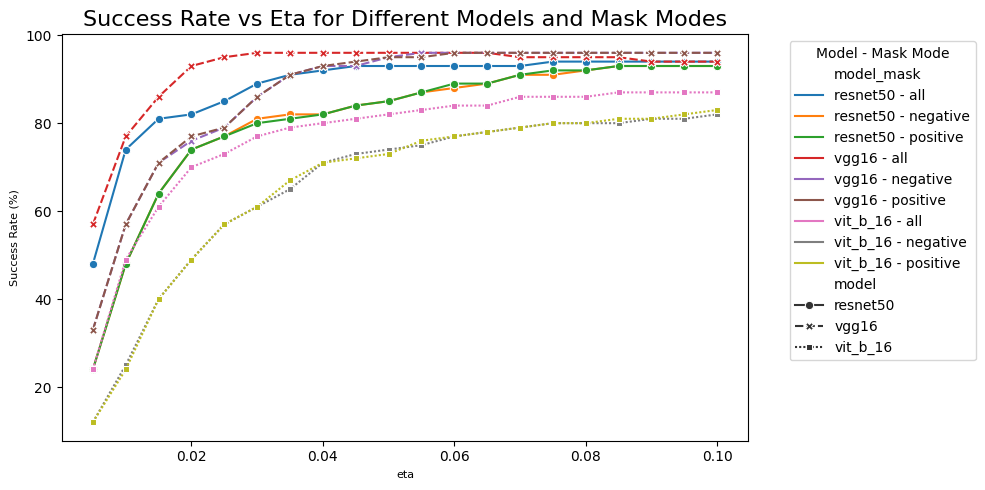

In [11]:
def plot_success_rate_vs_eta(data, algo):
    df_filtered = data[data['algo'] == algo].copy()
    df_filtered['model_mask'] = df_filtered['model'] + ' - ' + df_filtered['mask_mode']
    df_filtered['success_rate'] = df_filtered['success_rate'] * 100

    palette = sns.color_palette("tab10", n_colors=df_filtered['model_mask'].nunique())
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=df_filtered,
        x='eta',
        y='success_rate',
        hue='model_mask',
        style='model',  # 使用不同的线型
        palette=palette,
        markers=True,
        dashes=True
    )
    plt.title('Success Rate vs Eta for Different Models and Mask Modes', fontsize=16)
    plt.xlabel('eta', fontsize=8)
    plt.ylabel('Success Rate (%)', fontsize=8)
    plt.legend(title='Model - Mask Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_success_rate_vs_eta(data1, 'fgsm')

## 1.2 norm vs 成功率

In [21]:
def plot_success_rate_vs_norm(data, algo, eta):
    df_filtered = data[(data['eta'] == eta) & (data['algo'] == algo)].copy()
    df_filtered['success_rate'] = df_filtered['success_rate'].round(3) * 100
    metrics_titles = {
    'success_rate': '攻击成功率 (%)',
    'pixel_attacked': '被攻击的像素数量',
    'l1_norm': '梯度的一范数 (L1 Norm)',
    'l2_norm': '梯度的二范数 (L2 Norm)'
}
    palette = sns.color_palette("pastel", n_colors=df_filtered['model'].nunique())

    plt.figure(figsize=(15, 12))

    for i, (metric, title) in enumerate(metrics_titles.items(), 1):
        plt.subplot(2, 2, i)
        
        ax = sns.barplot(
            data=df_filtered,
            x='mask_mode',
            y=metric,
            hue='model',
            palette=palette
        )
        
        # 在柱形图上显示值
        for p in ax.patches:
            ax.annotate(
                format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points'
            )
        
        plt.title(f'{title} 与 Mask Mode 的关系', fontsize=14, fontproperties=font_prop)
        # plt.xlabel('Mask Mode', fontsize=12, fontproperties=font_prop)
        plt.ylabel(title, fontsize=12, fontproperties=font_prop)
        plt.xticks()
        
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not 

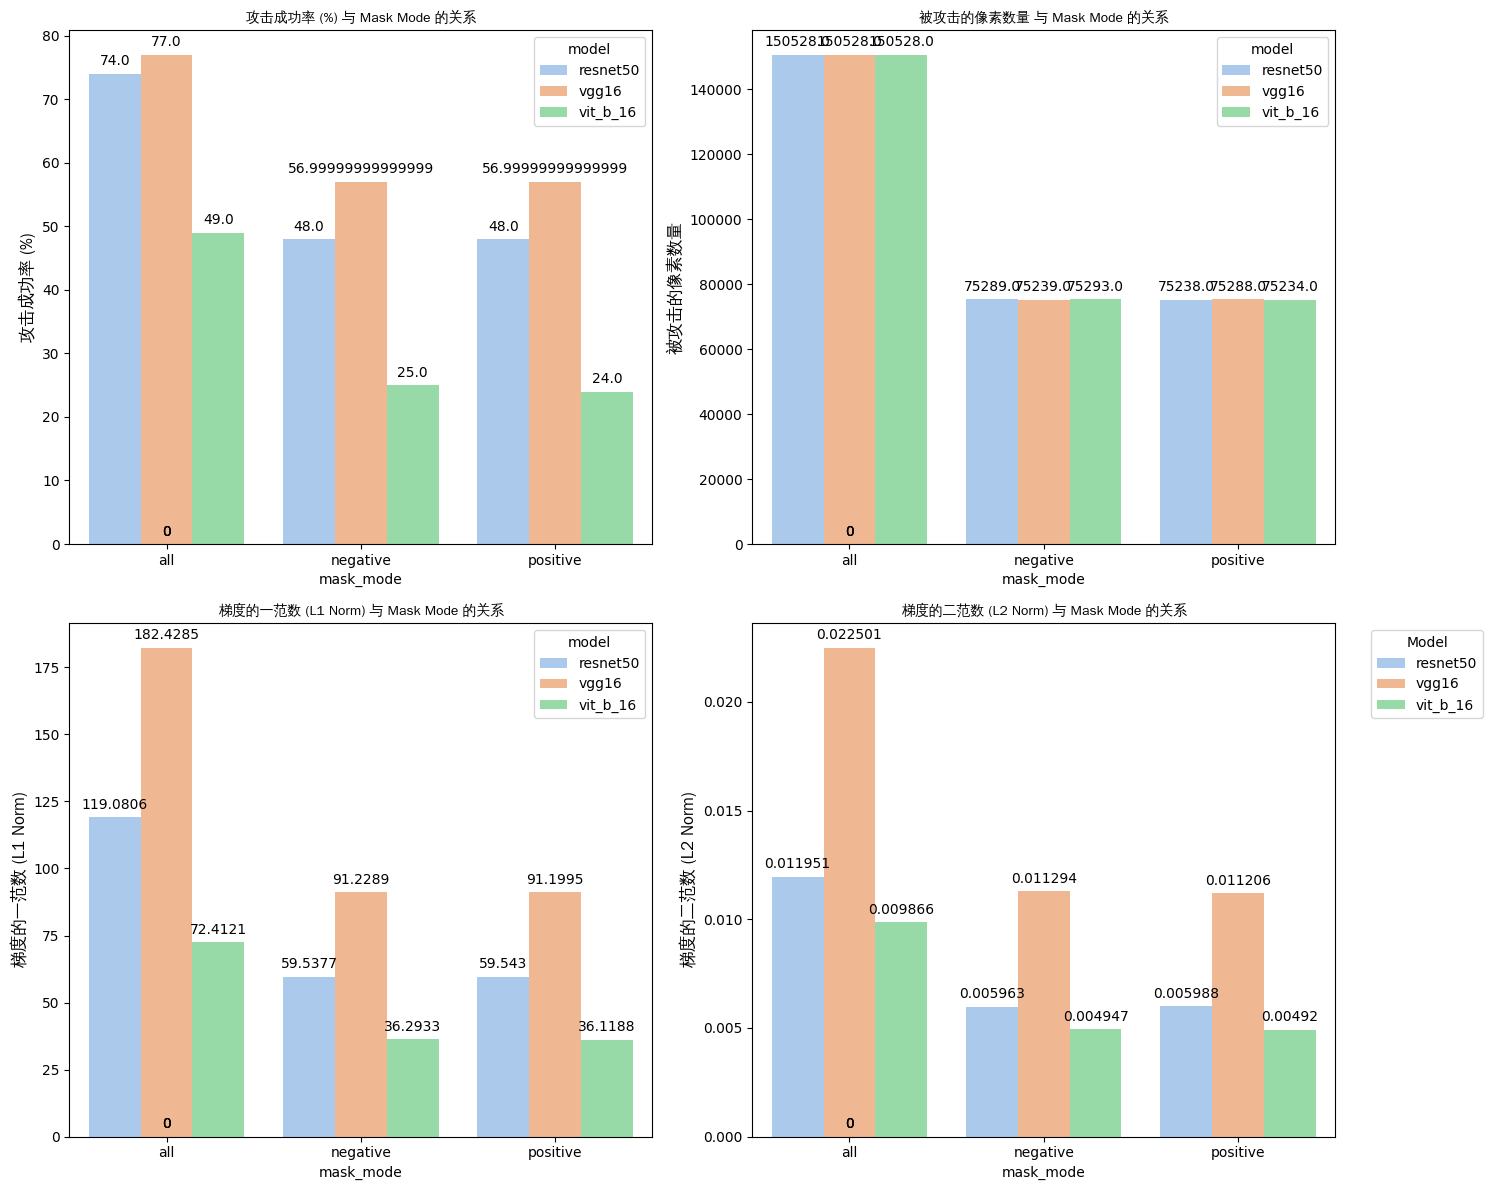

In [22]:
plot_success_rate_vs_norm(data1, 'fgsm', 0.01)

# 2. success_rate vs r
- 只考虑mask_mode in ('topr', 'cam_topr', 'randomr', 'cam_lowr', 'lowr')

In [8]:
data2 = data_grouped[data_grouped['mask_mode'].isin(['topr', 'cam_topr', 'randomr', 'cam_lowr', 'lowr'])]
data2.head()

,model,algo,mask_mode,parameter,eta,pixel_attacked,l1_norm,l2_norm,success_rate,run_time,batch_pictures,R,G,B
20,resnet50,fgsm,cam_lowr,0.01,0.005,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01
21,resnet50,fgsm,cam_lowr,0.01,0.010,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01
22,resnet50,fgsm,cam_lowr,0.01,0.015,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01
23,resnet50,fgsm,cam_lowr,0.01,0.020,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01
24,resnet50,fgsm,cam_lowr,0.01,0.025,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01


In [11]:
def calculate_eta_reverse(row):
    if row['mask_mode'] in ('cam_lowr', 'lowr'):
        return 1 - row['parameter']
    else:
        return row['parameter']
data2.loc[:, '1_parameter'] = data2.apply(calculate_eta_reverse, axis=1)
data2.drop('eta_reverse', axis=1, inplace=True)
data2.head()

/tmp/ipykernel_2778914/2305749624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[:, '1_parameter'] = data2.apply(calculate_eta_reverse, axis=1)
/tmp/ipykernel_2778914/2305749624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop('eta_reverse', axis=1, inplace=True)


,model,algo,mask_mode,parameter,eta,pixel_attacked,l1_norm,l2_norm,success_rate,run_time,batch_pictures,R,G,B,1_parameter
20,resnet50,fgsm,cam_lowr,0.01,0.005,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01,0.99
21,resnet50,fgsm,cam_lowr,0.01,0.010,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01,0.99
22,resnet50,fgsm,cam_lowr,0.01,0.015,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01,0.99
23,resnet50,fgsm,cam_lowr,0.01,0.020,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01,0.99
24,resnet50,fgsm,cam_lowr,0.01,0.025,1503,0.7738,0.000044,0.0,1.981,100,0.01,0.01,0.01,0.99


In [28]:
def plot_success_rate_vs_r(data, eta, algo, var, label_list):
    '''
    绘制不同模型下，各个标签（label）与参数（parameter）的关系图。
    每个子图表示一个模型和一个标签的关系，图例表示不同的 mask_mode。

    Args:
        data (pd.DataFrame): 数据集
        eta (float): eta值
        algo (str): 攻击算法
        var: x轴参数
        label_list (list): 需要绘制的标签列表，例如 ['success_rate', 'l1_norm', 'l2_norm']
    '''
    df_filtered = data[(data['eta'] == eta) & (data['algo'] == algo)].copy()
    df_filtered = df_filtered.reset_index(drop=True)
    if 'success_rate' in label_list:
        df_filtered['success_rate'] = df_filtered['success_rate'].round(3) * 100
    
    # 获取唯一的模型和mask_mode
    model_list = df_filtered['model'].unique()
    mask_mode_list = df_filtered['mask_mode'].unique()
    
    num_models = len(model_list)
    num_labels = len(label_list)
    cols = min(3, num_labels)  
    rows_per_model = math.ceil(num_labels / cols)
    nrows = num_models * rows_per_model
    ncols = cols
    sns.set(style="whitegrid")
    palette = sns.color_palette("tab10", n_colors=len(mask_mode_list))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(cols*5, nrows*4), squeeze=False)
    if nrows == 1 and ncols == 1:
        axes = [[axes]]
    elif nrows == 1 or ncols == 1:
        axes = axes.reshape(nrows, ncols)

    for i, model in enumerate(model_list):
        df_model = df_filtered[df_filtered['model'] == model]
        for j, label in enumerate(label_list):
            row = i * rows_per_model + (j // cols)
            col = j % cols
            ax = axes[row][col]
            
            # 筛选需要绘制的数据
            df_plot = df_model[[var, 'mask_mode', label]].dropna()
            sns.lineplot(
                data=df_plot, 
                x=var, 
                y=label, 
                hue='mask_mode', 
                ax=ax, 
                # marker='o', 
                palette=palette
            )
            
            # 设置子图标题和轴标签
            ax.set_title(f"Model: {model} | {label}", fontsize=12)
            ax.set_xlabel(f'{var}', fontsize=10)
            ax.set_ylabel(label, fontsize=10)
            ax.tick_params(axis='x')
            
            # 设置图例
            if j < cols:
                ax.legend(title='Mask Mode', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            else:
                ax.get_legend().remove()
    
    # 隐藏多余的子图
    total_subplots = nrows * ncols
    used_subplots = num_models * num_labels
    for idx in range(used_subplots, total_subplots):
        row = idx // ncols
        col = idx % ncols
        axes[row][col].axis('off')
    
    # 调整子图布局
    plt.tight_layout()
    plt.show()
    
    # 保存图表（可选）
    # plt.savefig('model_label_parameter_relationship.png', dpi=300, bbox_inches='tight')

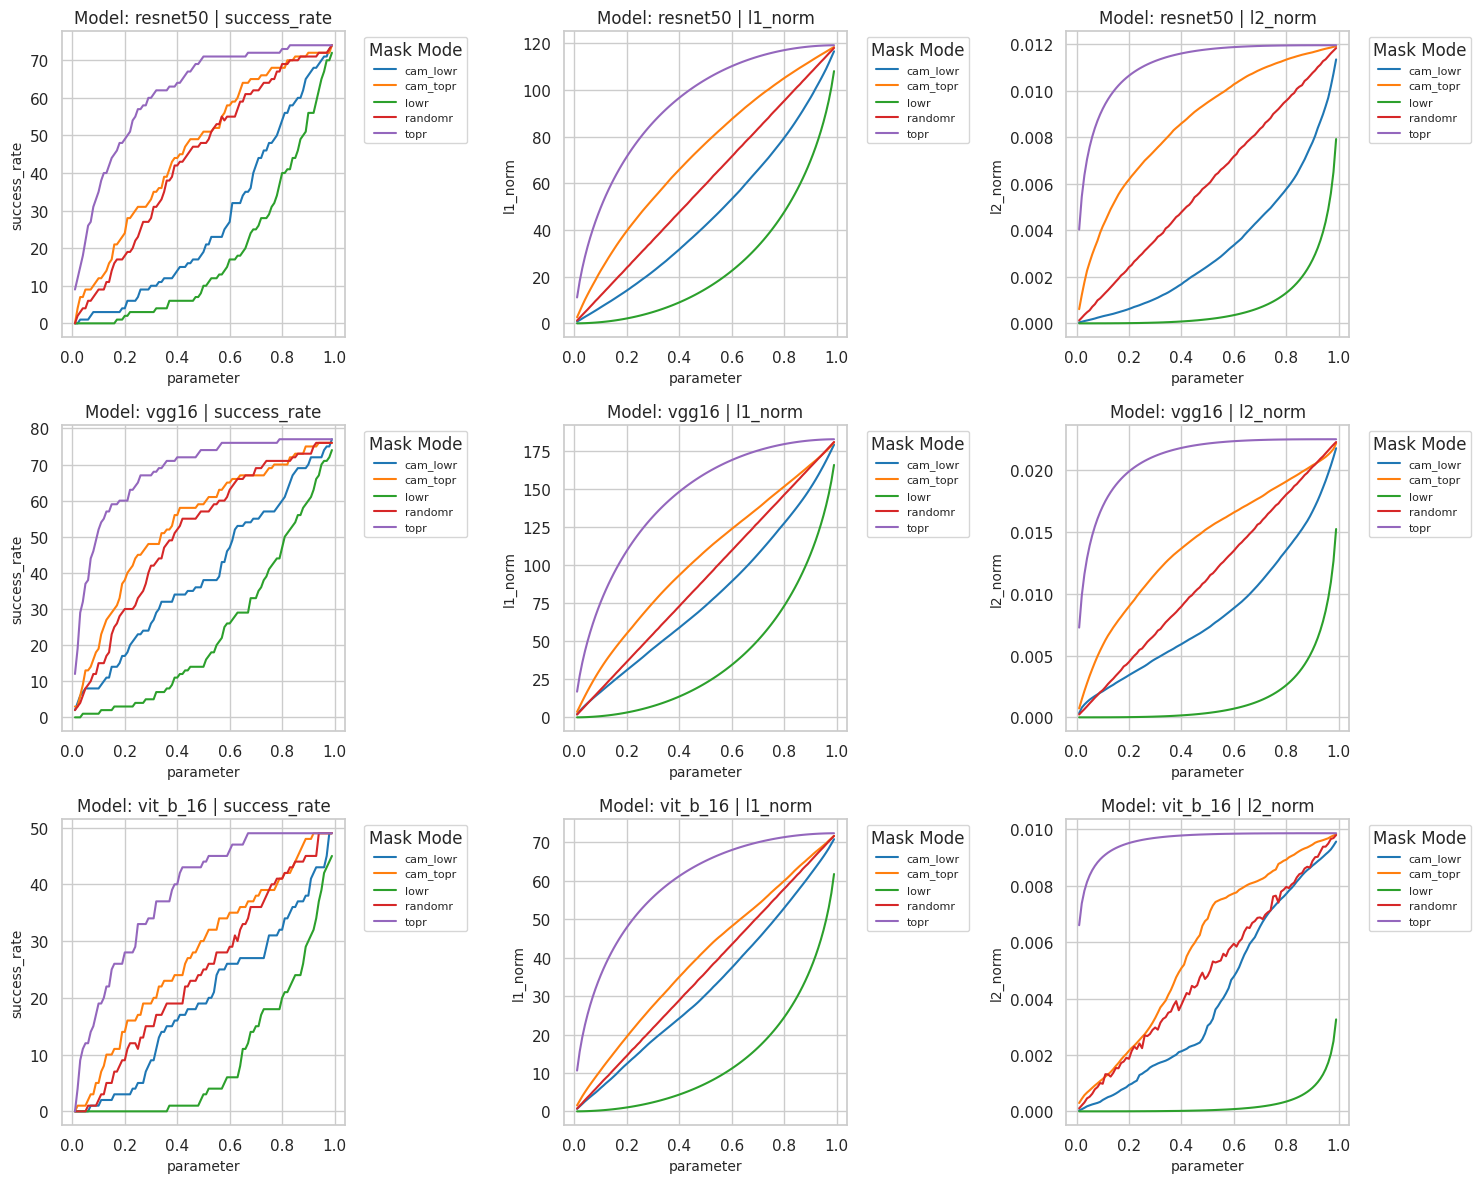

In [29]:
label_list = ['success_rate', 'l1_norm', 'l2_norm']
plot_success_rate_vs_r(data2, 0.01, 'fgsm', 'parameter', label_list)

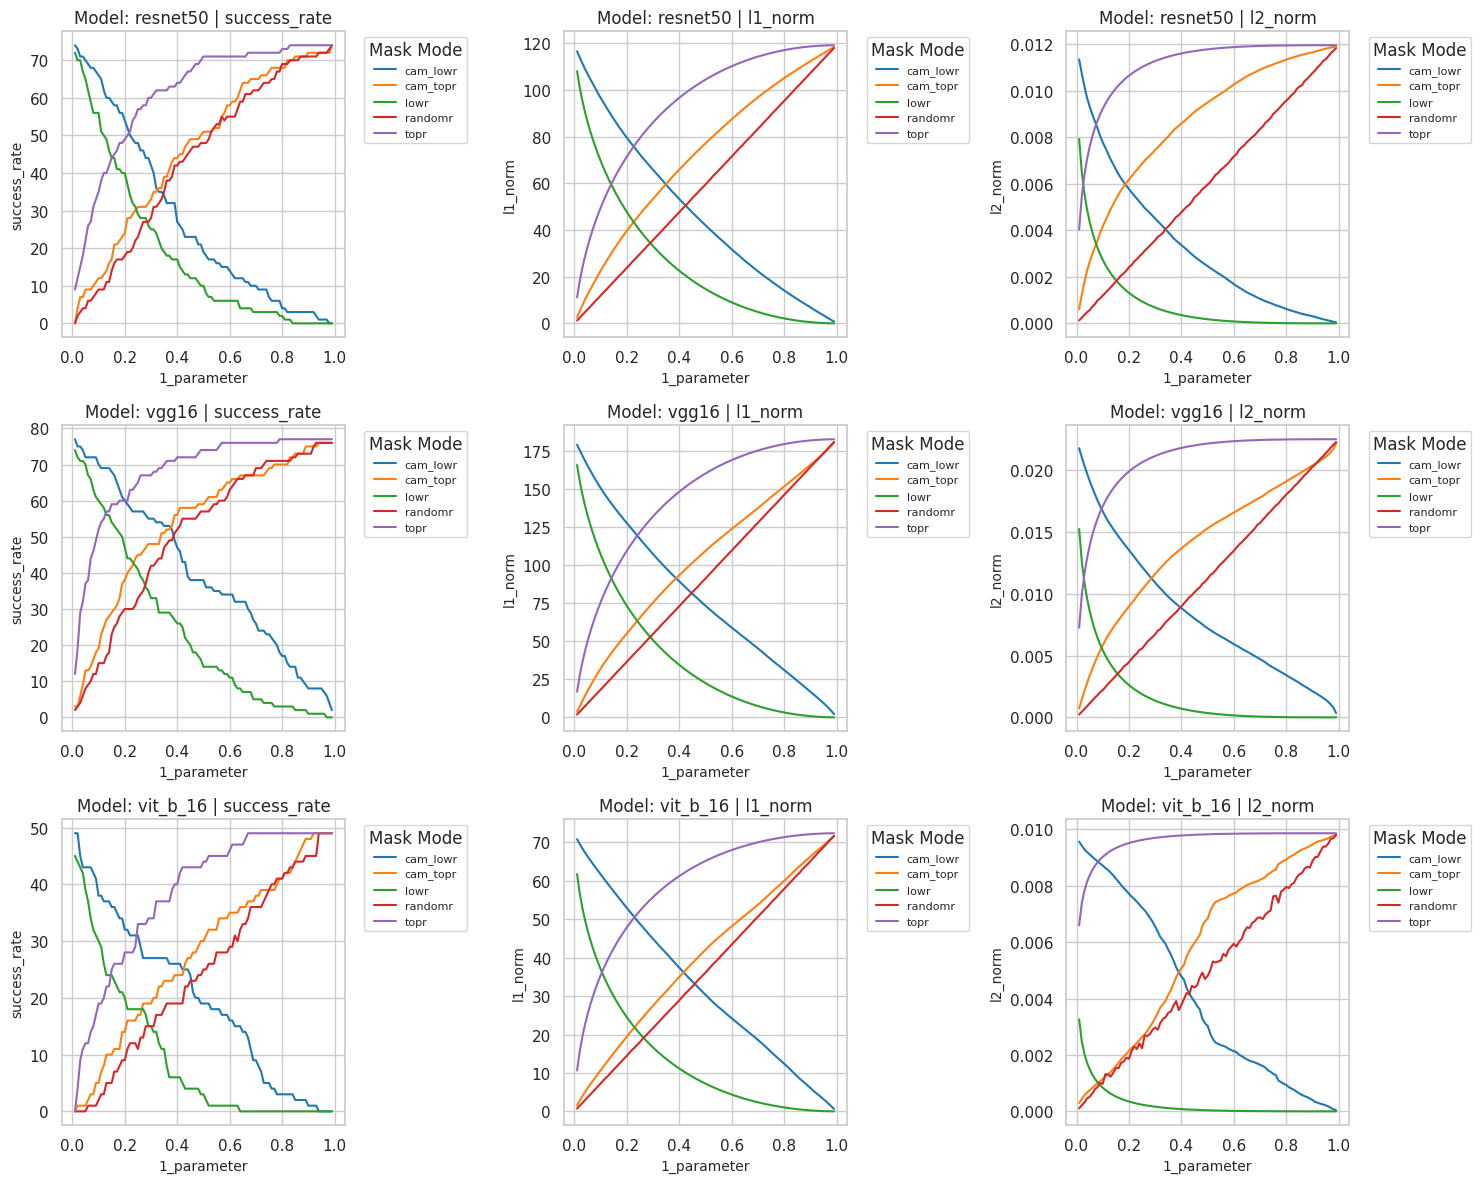

In [30]:
plot_success_rate_vs_r(data2, 0.01, 'fgsm', '1_parameter', label_list)

In [52]:
def plot_metrics_vs_success_rate_lines(data, eta, algo, label_list=['l1_norm', 'l2_norm']):
    '''
    绘制不同模型下，各个指标（如l1_norm和l2_norm）相对于success_rate的折线图。
    每个模型占据一行，每个指标占据一列，颜色表示不同的mask_mode。
    并为每个mask_mode绘制线性拟合的回归线，以虚线形式显示。

    Args:
        data (pd.DataFrame): 数据集
        eta (float): eta值
        algo (str): 攻击算法
        label_list (list): 需要绘制的指标列表，默认 ['l1_norm', 'l2_norm']
    '''
    df_filtered = data[(data['eta'] == eta) & (data['algo'] == algo)].copy()
    df_filtered = df_filtered.reset_index(drop=True)

    if 'success_rate' in df_filtered.columns:
        df_filtered['success_rate'] = df_filtered['success_rate'].round(3) * 100

    model_list = df_filtered['model'].unique()
    mask_mode_list = df_filtered['mask_mode'].unique()
    
    num_models = len(model_list)
    num_labels = len(label_list)
    
    sns.set(style="whitegrid")
    palette = sns.color_palette("tab10", n_colors=len(mask_mode_list))
    mask_mode_colors = dict(zip(mask_mode_list, palette))

    fig, axes = plt.subplots(num_models, num_labels, figsize=(6*num_labels, 5*num_models), squeeze=False)

    for i, model in enumerate(model_list):
        df_model = df_filtered[df_filtered['model'] == model]
        for j, label in enumerate(label_list):
            ax = axes[i][j]
            for mask_mode in mask_mode_list:
                df_mask = df_model[df_model['mask_mode'] == mask_mode]
                if df_mask.empty:
                    continue
                df_mask_sorted = df_mask.sort_values(by=label)
                
                sns.lineplot(
                    data=df_mask_sorted,
                    x=label,
                    y='success_rate',
                    label=mask_mode,
                    color=mask_mode_colors[mask_mode],
                    # marker='o',
                    ax=ax
                )
                
                if len(df_mask_sorted) >= 2:
                    X = df_mask_sorted[label].values.reshape(-1, 1)
                    y = df_mask_sorted['success_rate'].values
                    reg = LinearRegression()
                    reg.fit(X, y)
                    y_pred = reg.predict(X)
                    
                    # 绘制回归线（虚线）
                    ax.plot(df_mask_sorted[label], y_pred, color=mask_mode_colors[mask_mode], linestyle='--')
            
            ax.set_title(f"Model: {model} | {label} vs Success Rate", fontsize=14)
            ax.set_xlabel(label, fontsize=12)
            ax.set_ylabel('Success Rate (%)', fontsize=12)
            ax.tick_params(axis='x')
      
            if i % 2 == 0 and j % 2 == 0:
                ax.legend(title='Mask Mode', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
            else:
                ax.get_legend().remove()
    plt.tight_layout()
    plt.show()
    # fig.savefig('model_metrics_vs_success_rate_lines.png', dpi=300, bbox_inches='tight')


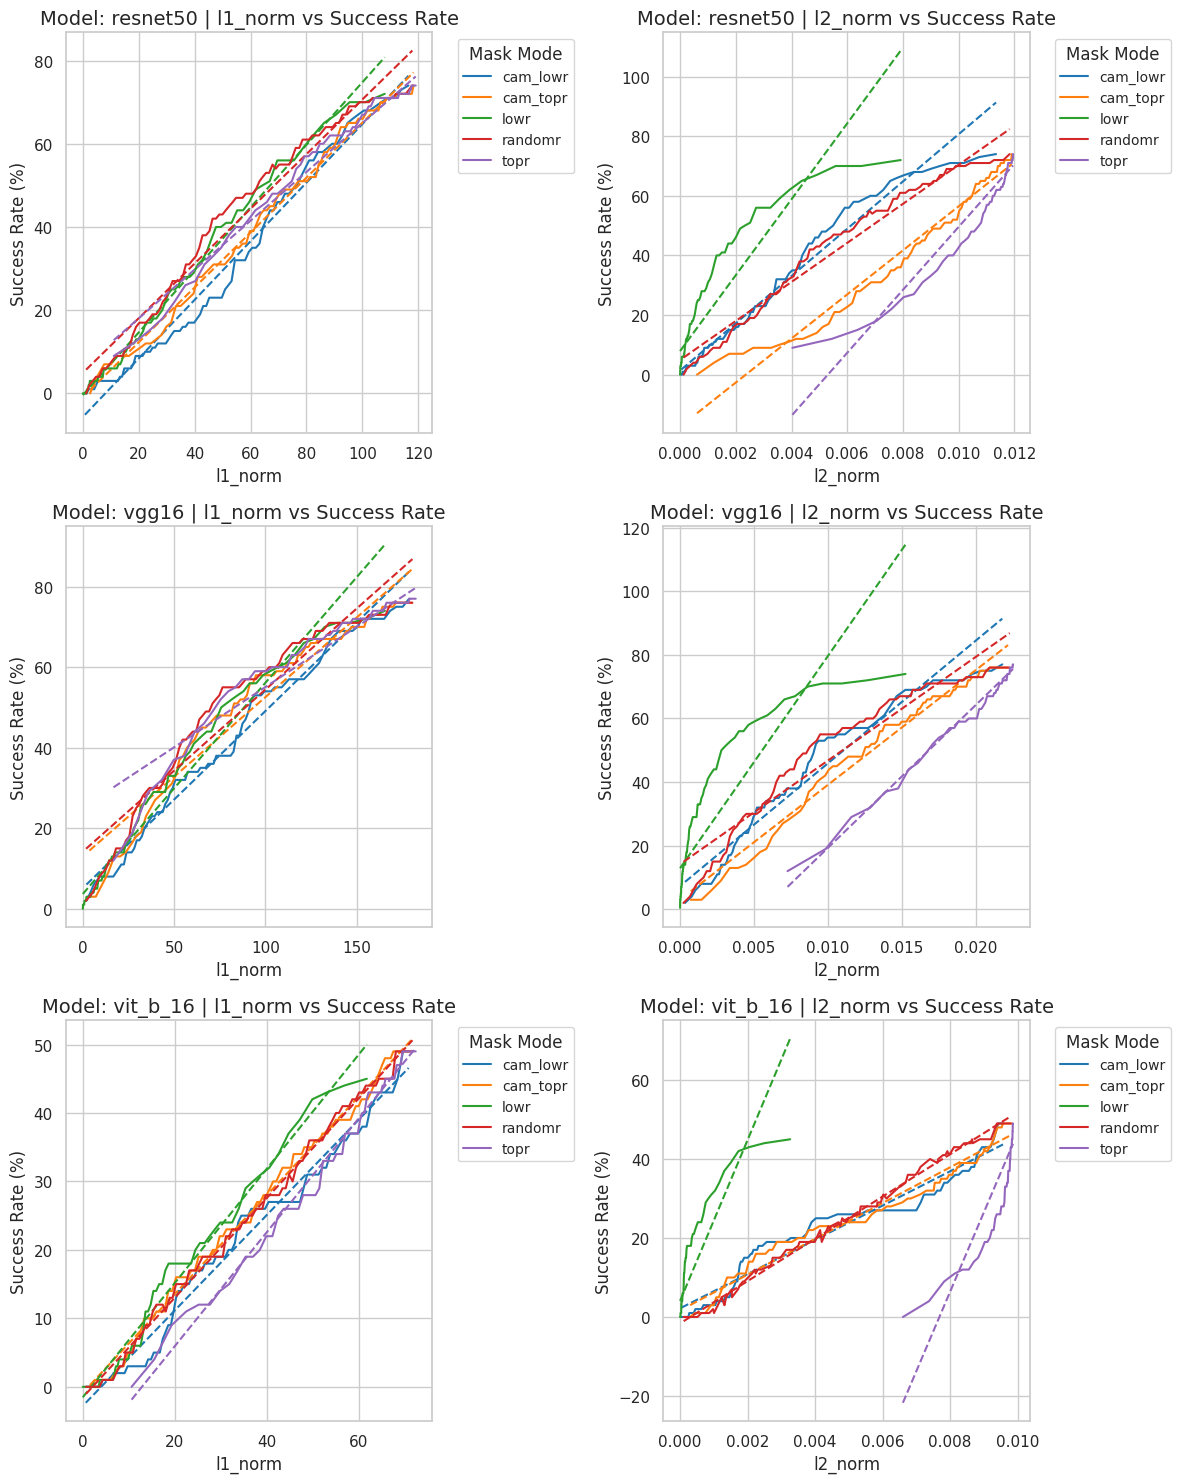

In [53]:
label_list = ['l1_norm', 'l2_norm']
plot_metrics_vs_success_rate_lines(data2, 0.01, 'fgsm', label_list)

In [62]:
import plotly.express as px
def plot_3d_scatter_plotly(data, eta, algo, metric='l1_norm'):
    '''
    使用Plotly绘制不同模型下，success_rate与parameter和指定metric（l1_norm或l2_norm）的交互式三维散点图。
    每个模型占据一张图，颜色表示不同的mask_mode。
    
    Args:
        data (pd.DataFrame): 数据集
        eta (float): eta值
        algo (str): 攻击算法
        metric (str): 指标名称，'l1_norm'或'l2_norm'
    '''
    df_filtered = data[(data['eta'] == eta) & (data['algo'] == algo)].copy()
    df_filtered = df_filtered.reset_index(drop=True)
    if 'success_rate' in df_filtered.columns:
        df_filtered['success_rate'] = df_filtered['success_rate'].round(3) * 100
    
    model_list = df_filtered['model'].unique()
    mask_mode_list = df_filtered['mask_mode'].unique()
    
    palette = sns.color_palette("tab10", n_colors=len(mask_mode_list))
    mask_mode_colors = dict(zip(mask_mode_list, palette))
    
    for model in model_list:
        df_model = df_filtered[df_filtered['model'] == model]
        
        if metric not in df_model.columns:
            print(f"Warning: Metric '{metric}' not found in data for model '{model}'. Skipping.")
            continue
    
        fig = px.scatter_3d(
            df_model,
            x='parameter',
            y='success_rate',
            z=metric,
            color='mask_mode',
            title=f"Model: {model} | Success Rate vs Parameter and {metric}",
            labels={
                'parameter': 'Parameter',
                'success_rate': 'Success Rate (%)',
                metric: metric.replace('_', ' ').title()
            },
            opacity=0.7
        )
        fig.update_layout(legend_title_text='Mask Mode')
        fig.show()
        # fig.write_image(f'model_{model}_3D_success_rate_vs_parameter_{metric}.png')


In [63]:
plot_3d_scatter_plotly(data2, 0.01, 'fgsm', 'l1_norm')

In [64]:
plot_3d_scatter_plotly(data2, 0.01, 'fgsm', 'l2_norm')